In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Importance Sampling
Calculate the integral $\int_0^1 \sqrt x dx=\frac{2}{3}$ using simple MC integration and importance sampling with $P(x)=1-e^{-ax}$ Find the values of $a$ that minimizes the variance.

In [46]:

def g(x):
    return np.sqrt(x)

def P(x,a):
    norm = (a-1+np.exp(-a))/a
    return (1-np.exp(-a*x))/norm

def IS(N,a):
    norm = (a-1+np.exp(-a))/a
    rand_x = np.random.random(N)
    rand_y = np.random.random(N)
    lower = np.where(rand_y<=(1-np.exp(-a*rand_x))/norm)
    r = rand_x[lower]
    n0 = np.size(r)
    return n0,r
        

Text(0,0.5,'Variance')

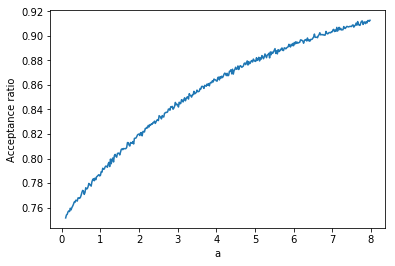

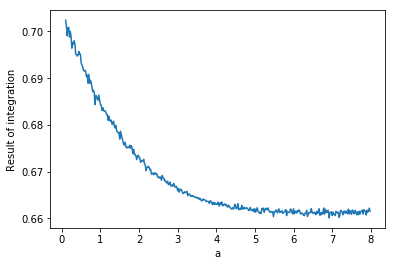

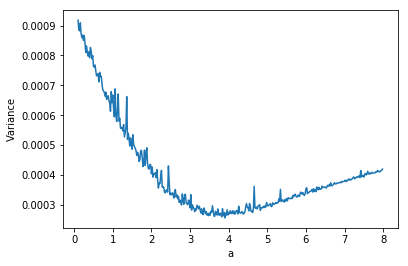

In [47]:
N=100000
arange = np.arange(0.1,8,0.02)
ratio = []
Irange = []
varrange = []
for a in arange:
    n0,r = IS(N,a)
    I = g(r)/P(r,a)
    Itot = np.sum(I)/n0
    I2tot = np.sum(I**2)/n0
    Ivar = np.sqrt(abs(I2tot-Itot**2)/n0)
    
    ratio.append(n0/N)
    Irange.append(Itot)
    varrange.append(Ivar)


plt.figure()
plt.plot(arange,ratio)
plt.xlabel("a")
plt.ylabel("Acceptance ratio")

plt.figure()
plt.plot(arange,Irange)
plt.xlabel("a")
plt.ylabel("Result of integration")

plt.figure()
plt.plot(arange,varrange)
plt.xlabel("a")
plt.ylabel("Variance")